# 6.4: Supervised Machine Learning: Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path=r'C:\Users\banda\Chocolate'

In [4]:
df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_clean2.csv'))

In [5]:
df. head()

,Unnamed: 0,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Rating Flag,Year
0,0,A. Morin,Agua Grande,1876,2024-02-18,0.63,France,3.75,NaN,Sao Tome,High rating,2024
1,1,A. Morin,Kpime,1676,2024-02-18,0.70,France,2.75,NaN,Togo,Mid rating,2024
2,2,A. Morin,Atsane,1676,2024-02-18,0.70,France,3.00,NaN,Togo,Mid rating,2024
3,3,A. Morin,Akata,1680,2024-02-18,0.70,France,3.50,NaN,Togo,High rating,2024
4,4,A. Morin,Quilla,1704,2024-02-18,0.70,France,3.50,NaN,Peru,High rating,2024


In [6]:
##Drop unnamed columns in df
df = df.drop(columns = ['Unnamed: 0'])

### Data Cleaning
Done cleanig in previous notebook.

In [7]:
df.shape

(1793, 11)

### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

Company_Name          0
Bean_Origin_Name      0
Reference_number      0
Review_Date           0
Cocoa_Percent         0
Company_Location      0
Rating                0
Bean_Type           887
Bean_Origin          73
Rating Flag           0
Year                  0
dtype: int64

Will work with variable that does have bean type and bean origin so we will skip on deleting the data for now

### Duplicate checks

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # not duplicate

(1793,)

#### Extreme value checks

C:\Users\banda\AppData\Local\Temp\ipykernel_49432\823754530.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'], bins=25)
C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Density'>

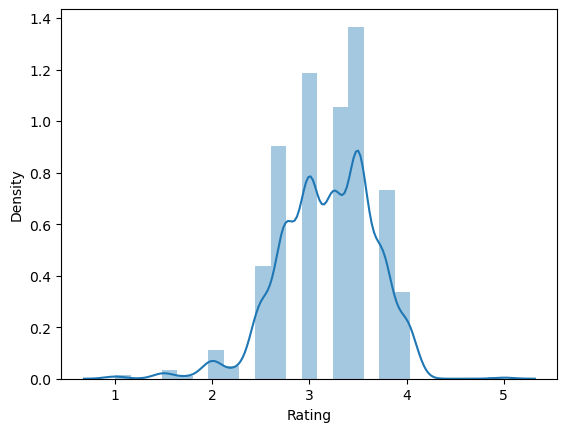

In [11]:
sns.distplot(df['Rating'], bins=25)

C:\Users\banda\AppData\Local\Temp\ipykernel_49432\1124047387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cocoa_Percent'], bins=25)
C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cocoa_Percent', ylabel='Density'>

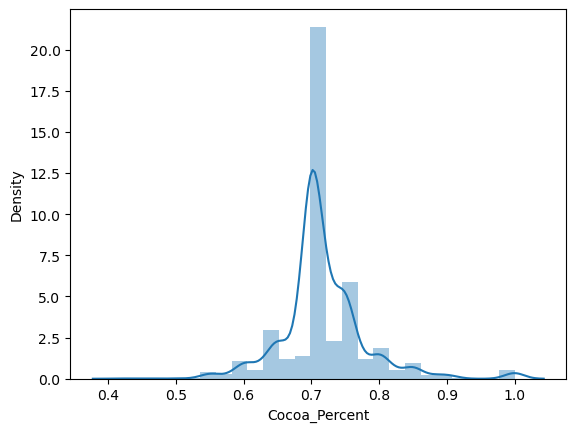

In [12]:
sns.distplot(df['Cocoa_Percent'], bins=25)

###  Data prep for regression analysis 

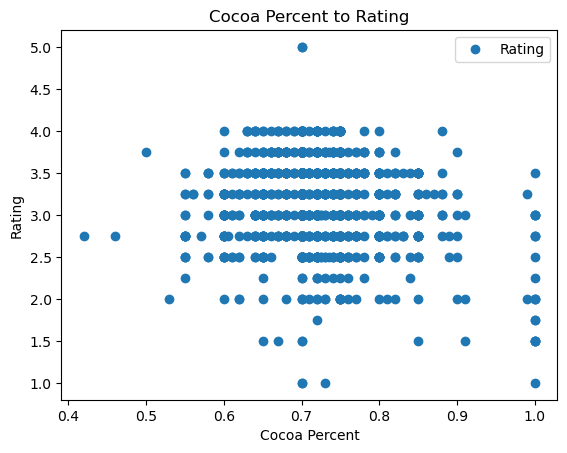

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Cocoa_Percent', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cocoa Percent to Rating')  
plt.xlabel('Cocoa Percent')  
plt.ylabel('Rating')  
plt.show()

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Cocoa_Percent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [15]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [16]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Regression analysis

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

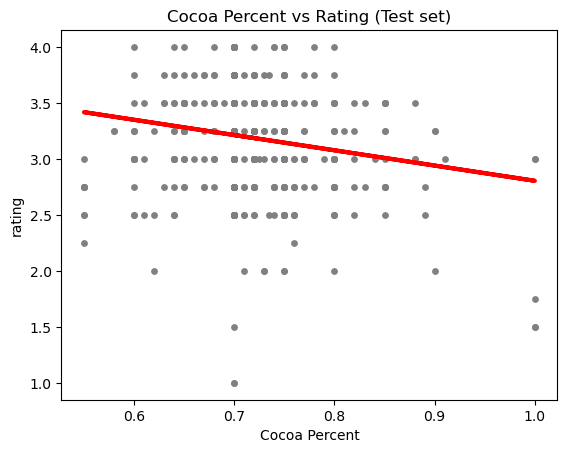

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('rating')
plot_test.show()

We can see that as the Cocoa Pecentage increaes the rating drops. the better the coholcate the less tasty it is. 

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.36248653]]
Mean squared error:  0.22105675859047755
R2 score:  0.013460628082745174


#### Answer to 6.3 Questions
An Slope of -1.36 show there is negative relatioship.
Mean Square MSE of 0.221 suggests that, on average, the squared difference between the predicted and actual values is 0.221.
An R2 score of 0.013 suggests that only a small proportion of the variance in the rating is explained by the Cocoa Percent. 

In [24]:
y_predicted

array([[3.21322597],
       [3.14510164],
       [3.18597624],
       [3.21322597],
       [3.21322597],
       [3.14510164],
       [3.14510164],
       [3.18597624],
       [3.14510164],
       [3.21322597],
       [3.2404757 ],
       [3.14510164],
       [2.94072866],
       [3.21322597],
       [3.2813503 ],
       [3.21322597],
       [3.21322597],
       [3.21322597],
       [3.18597624],
       [3.18597624],
       [3.41759895],
       [3.21322597],
       [3.29497516],
       [3.11785191],
       [3.33584976],
       [3.03610272],
       [3.14510164],
       [3.21322597],
       [3.21322597],
       [3.2813503 ],
       [3.2404757 ],
       [3.21322597],
       [3.13147678],
       [3.21322597],
       [3.14510164],
       [3.34947462],
       [3.21322597],
       [3.1996011 ],
       [3.21322597],
       [3.21322597],
       [3.13147678],
       [3.07697732],
       [3.18597624],
       [3.17235137],
       [3.07697732],
       [3.14510164],
       [3.21322597],
       [3.213

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.25,3.213226
1,3.25,3.145102
2,3.00,3.185976
3,3.25,3.213226
4,2.50,3.213226
5,2.75,3.145102
6,3.50,3.145102
7,3.75,3.185976
8,2.75,3.145102
9,3.25,3.213226


Compare how the regression fits the training set

In [26]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.36248653]]
Mean squared error:  0.22229413563779082
R2 score:  0.03211306892841792


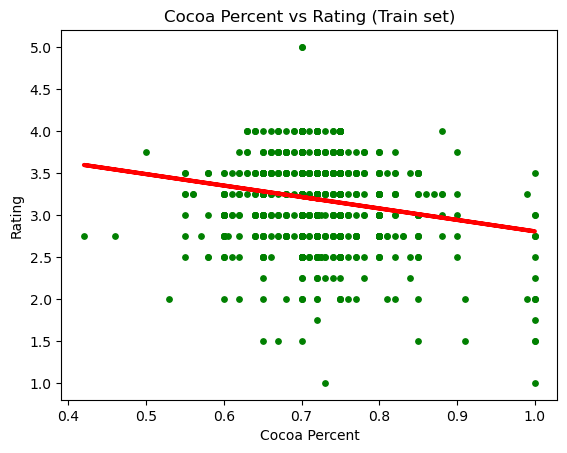

In [29]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Train set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

This is not a fitted model for this perticular resgression analysis.

---------------------------------------------------------------------------------------

#### Exploring further into data set. 

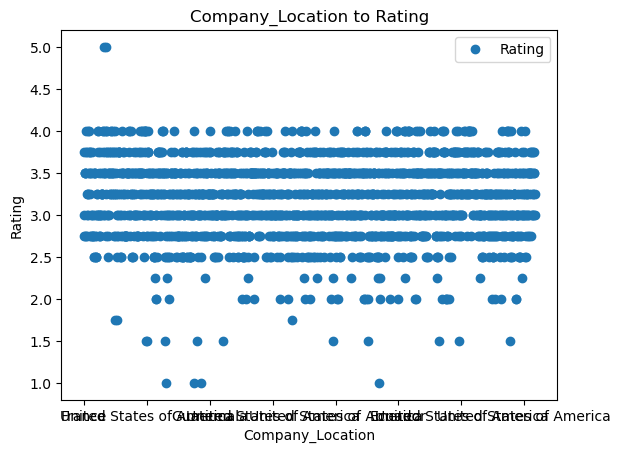

In [30]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Company_Location', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Company_Location to Rating')  
plt.xlabel('Company_Location')  
plt.ylabel('Rating')  
plt.show()

In [31]:
df.head()


,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Rating Flag,Year
0,A. Morin,Agua Grande,1876,2024-02-18,0.63,France,3.75,NaN,Sao Tome,High rating,2024
1,A. Morin,Kpime,1676,2024-02-18,0.70,France,2.75,NaN,Togo,Mid rating,2024
2,A. Morin,Atsane,1676,2024-02-18,0.70,France,3.00,NaN,Togo,Mid rating,2024
3,A. Morin,Akata,1680,2024-02-18,0.70,France,3.50,NaN,Togo,High rating,2024
4,A. Morin,Quilla,1704,2024-02-18,0.70,France,3.50,NaN,Peru,High rating,2024


In [32]:
# Mapping of countries to continents
continent_mapping = {
    'Europe': ['France', 'Switzerland', 'Netherlands', 'Spain', 'Italy', 'U.K.', 'Belgium', 'Germany', 'Russia', 'Amsterdam',
               'Scotland', 'Portugal', 'Denmark', 'Czech Republic', 'Finland', 'Sweden', 'Poland', 'Austria', 'Lithuania', 'Hungary', 'Iceland', 'Ireland'],
    'North America': ['United States of America', 'Canada', 'Mexico', 'Puerto Rico', 'Domincan Republic', 'Nicaragua'],
    'Oceania': ['Fiji', 'Australia', 'New Zealand'],
    'South America': ['Ecuador', 'Brazil', 'Venezuela', 'Colombia', 'Argentina', 'Guatemala', 'Bolivia', 'Chile', 'Suriname'],
    'Asia': ['Japan', 'South Korea', 'Singapore', 'Vietnam', 'Israel', 'India', 'Philippines'],
    'Africa': ['South Africa', 'Martinique', 'Sao Tome', 'Costa Rica', 'Grenada', 'Madagascar', 'Ghana']
}

In [33]:
# Create a new 'Continent' column based on the mapping using a loop
df['Continent'] = None  # Initialize the column

for continent, countries in continent_mapping.items():
    df.loc[df['Company_Location'].isin(countries), 'Continent'] = continent

In [34]:
df.head()

,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Rating Flag,Year,Continent
0,A. Morin,Agua Grande,1876,2024-02-18,0.63,France,3.75,NaN,Sao Tome,High rating,2024,Europe
1,A. Morin,Kpime,1676,2024-02-18,0.70,France,2.75,NaN,Togo,Mid rating,2024,Europe
2,A. Morin,Atsane,1676,2024-02-18,0.70,France,3.00,NaN,Togo,Mid rating,2024,Europe
3,A. Morin,Akata,1680,2024-02-18,0.70,France,3.50,NaN,Togo,High rating,2024,Europe
4,A. Morin,Quilla,1704,2024-02-18,0.70,France,3.50,NaN,Peru,High rating,2024,Europe


In [35]:
df['Continent'].value_counts(dropna = False)

Continent
North America    905
Europe           567
South America    138
Oceania           70
Asia              47
Africa            38
None              28
Name: count, dtype: int64

In [36]:
# Display rows where 'Continent' is None
none_rows = df[df['Continent'].isna()]
print(none_rows)

                           Company_Name  \
67                              Amazona   
68                              Amazona   
149                               Bakau   
150                               Bakau   
156                         Baravelli's   
320   Cacaosuyo (Theobroma Inversiones)   
617                      Emerald Estate   
618                      Emerald Estate   
940                        La Oroquidea   
988            Machu Picchu Trading Co.   
989            Machu Picchu Trading Co.   
1045                             Marana   
1046                             Marana   
1047                             Marana   
1101                          Mesocacao   
1102                          Mesocacao   
1103                          Mesocacao   
1104                          Mesocacao   
1105                          Mesocacao   
1106                          Mesocacao   
1190                         Nova Monda   
1237                           Orquidea   
1238       

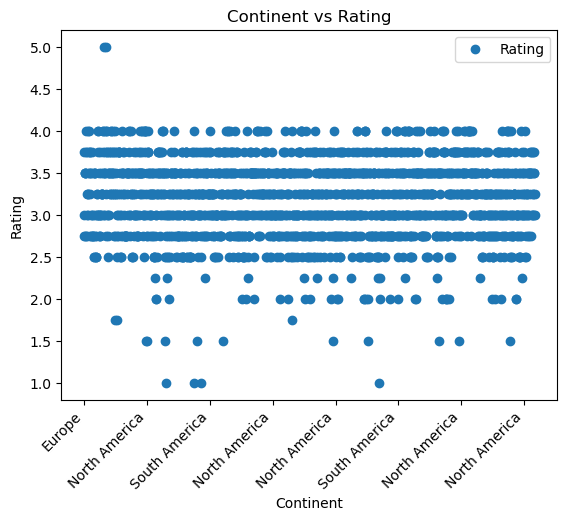

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

# Your plotting code
df.plot(x='Continent', y='Rating', style='o')
plt.title('Continent vs Rating')
plt.xlabel('Continent')
plt.ylabel('Rating')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

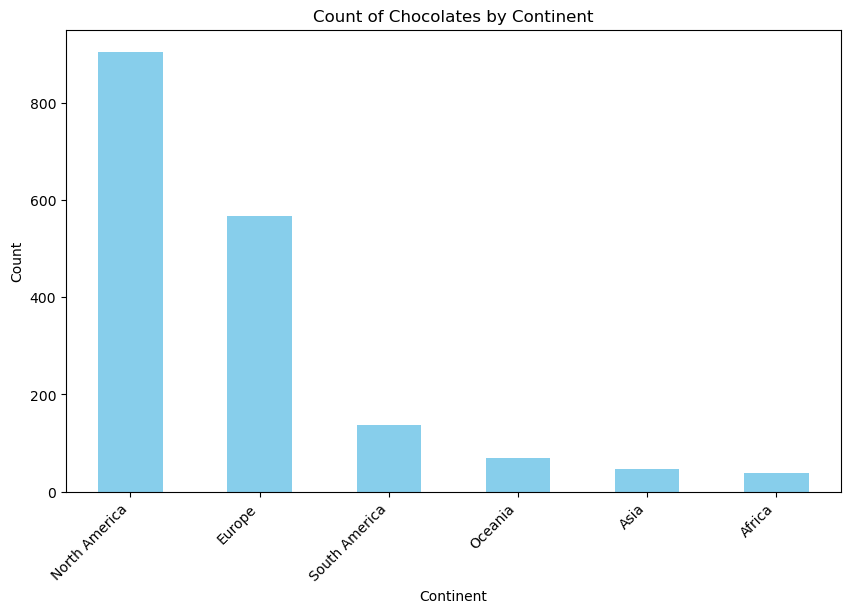

In [38]:
# Count the occurrences of each continent
continent_counts = df['Continent'].value_counts()

# Create a bar chart
barcontient=plt.figure(figsize=(10, 6))
continent_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Chocolates by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [39]:
path=r'C:\Users\banda\Chocolate'

In [40]:
barcontient.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'contientrating.png'))

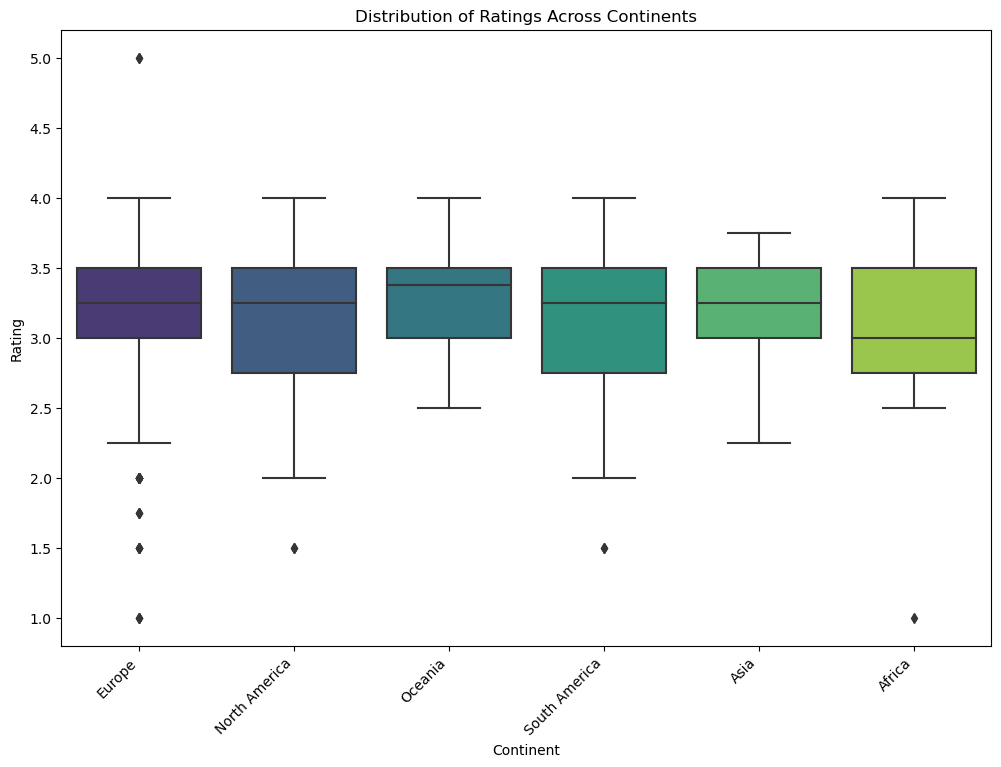

In [41]:
# Create a boxplot
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x='Continent', y='Rating', data=df, palette='viridis')

# Setting plot labels and title
plt.title('Distribution of Ratings Across Continents')
plt.xlabel('Continent')
plt.ylabel('Rating')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [42]:
boxplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxcontientrating.png'))

C:\Users\banda\AppData\Local\Temp\ipykernel_49432\1289627595.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_chart = sns.barplot(x='Continent', y='Rating', data=df, ci=None, palette='viridis')


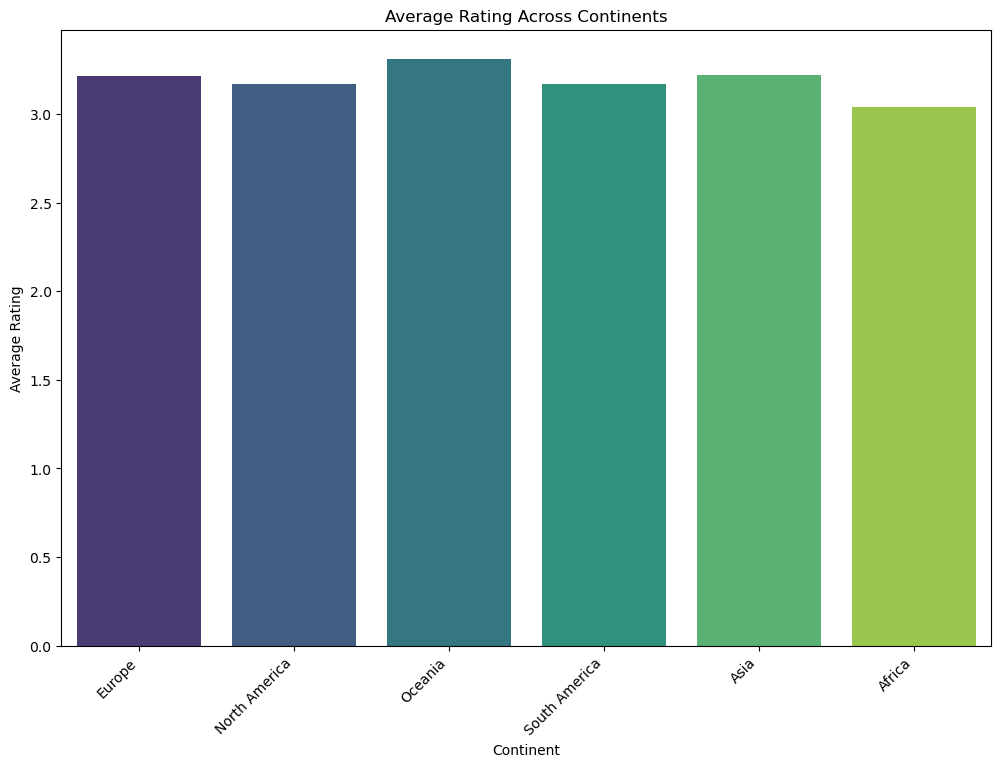

In [43]:
# Create a bar chart
plt.figure(figsize=(12, 8))
bar_chart = sns.barplot(x='Continent', y='Rating', data=df, ci=None, palette='viridis')

# Setting plot labels and title
plt.title('Average Rating Across Continents')
plt.xlabel('Continent')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

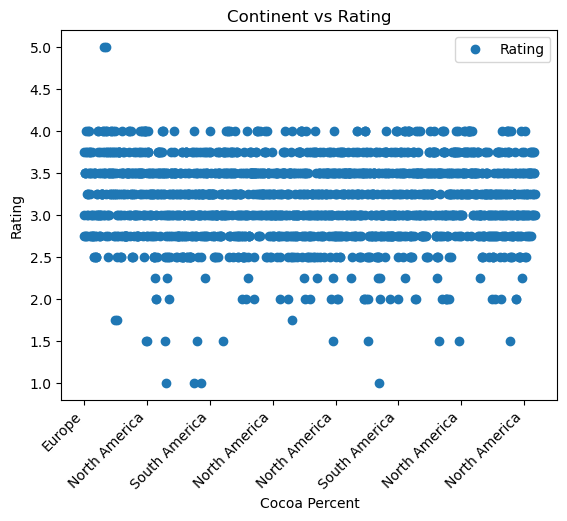

In [44]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Continent', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Continent vs Rating')  
plt.xlabel('Cocoa Percent')  
plt.ylabel('Rating')  
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Continent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [46]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'chocoalate_clean_withcontinent.csv'))